In [3]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


In [10]:
df = pd.read_csv('datos.csv', sep=",")
df.describe()

,Hora,Radiacion,Temperatura
count,55057.000000,55057.000000,55057.000000
mean,11.531994,141.925368,299.771280
std,6.941456,233.493456,4.018667
min,0.000000,-9.000000,291.850000
25%,6.000000,-1.000000,296.750000
50%,12.000000,0.000000,298.450000
75%,18.000000,222.000000,302.150000
max,23.000000,1459.000000,314.850000


In [11]:
df['Mes'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
df.describe()

,Hora,Radiacion,Temperatura,Mes
count,55057.000000,55057.000000,55057.000000,55057.000000
mean,11.531994,141.925368,299.771280,6.068965
std,6.941456,233.493456,4.018667,3.225913
min,0.000000,-9.000000,291.850000,1.000000
25%,6.000000,-1.000000,296.750000,3.000000
50%,12.000000,0.000000,298.450000,6.000000
75%,18.000000,222.000000,302.150000,9.000000
max,23.000000,1459.000000,314.850000,12.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\1748928337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Temperatura':'Temperature','Hora':'Time of Day', 'Radiacion':'Radiance','Mes':'Month'},inplace=True)


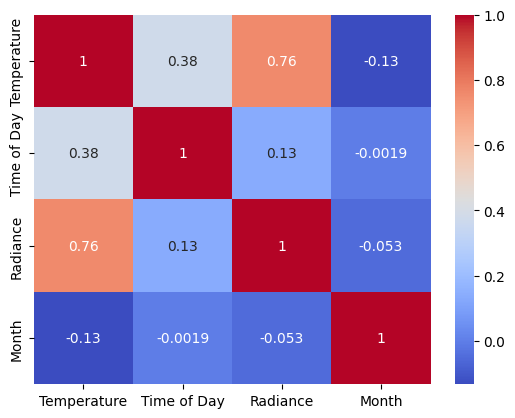

In [12]:
df2 = df[['Temperatura','Hora','Radiacion', 'Mes']]
df2.rename(columns={'Temperatura':'Temperature','Hora':'Time of Day', 'Radiacion':'Radiance','Mes':'Month'},inplace=True)
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#df2=df.loc[(df['Hora'] >= 12) & (df['Hora'] <= 13)]
df2=df
x = df2[['Temperatura','Hora','Mes']]
y = df2['Radiacion']

# Con sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
score = regr.score(x_train, y_train)
print('Score: \n', score)
print('Intercept: \n', regr.intercept_)
print('Coeficientes: \n', regr.coef_)
predictions = regr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

fig = sns.scatterplot(x=x_test['Temperatura'], y=y_test)
plt.scatter(x_test['Temperatura'], y=predictions)
plt.show()


# Con statsmodels
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)
fig = sns.scatterplot(data=df2, x='Temperatura', y='Radiacion', hue='Hora', palette='Paired_r')
plt.scatter(x['Temperatura'], y=predictions, color='b')
plt.show()


                            OLS Regression Results                            
Dep. Variable:              Radiacion   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 7.413e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:42:32   Log-Likelihood:            -3.5488e+05
No. Observations:               55057   AIC:                         7.098e+05
Df Residuals:                   55055   BIC:                         7.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.305e+04     48.464   -269.313      

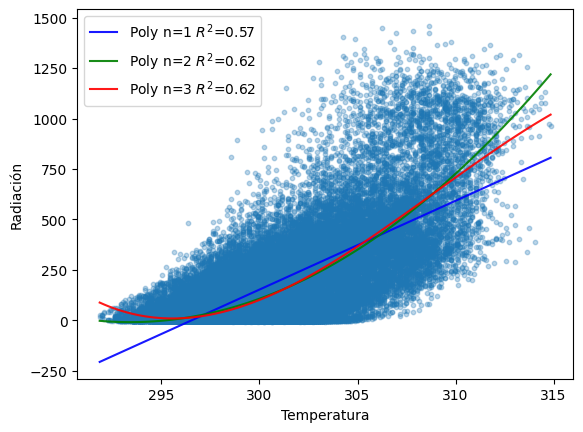

In [ ]:
plt.scatter(df2['Temperatura'], df2['Radiacion'], s=10, alpha=0.3)
plt.xlabel('Temperatura')
plt.ylabel('Radiación')

x = pd.DataFrame({'Temperatura': np.linspace(df2['Temperatura'].min(), df2['Temperatura'].max(), 100)})

import statsmodels.formula.api as smf
# 1-st orden polynomial
poly_1 = smf.ols(formula='Radiacion ~ 1 + Temperatura', data=df2).fit()
plt.plot(x.Temperatura, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,
         alpha=0.9)
print(poly_1.summary())

# 2-nd orden polynomial
poly_2 = smf.ols(formula='Radiacion ~ 1 + Temperatura + I(Temperatura ** 2.0)', data=df2).fit()
plt.plot(x.Temperatura, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared,
         alpha=0.9)
print(poly_2.summary())

# 3-rd orden polynomial
poly_3 = smf.ols(formula='Radiacion ~ 1 + Temperatura + I(Temperatura ** 2.0) + I(Temperatura ** 3.0)', data=df2).fit()
plt.plot(x.Temperatura, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

print(poly_3.summary())
plt.legend()

KNeighborsRegressor(metric='euclidean', n_jobs=1, n_neighbors=10,
                    weights='distance')
Knn Score:  0.7769125350898337
Knn Mean Squared Error: 12162.327867965696
Root Mean Squared Error: 110.28294459237881


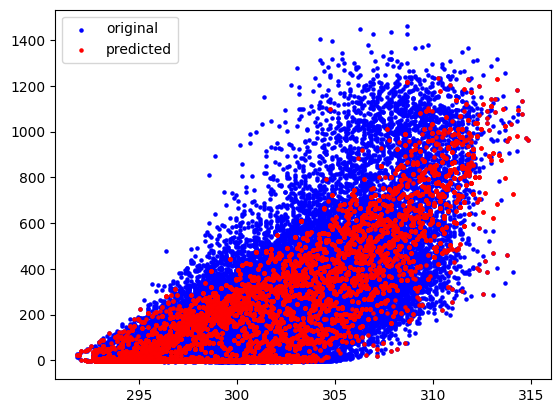

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

x = df2[['Temperatura','Hora']]
y = df2['Radiacion']

model= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

model.fit(x,y)
pred_y = model.predict(x)
score=model.score(x,y)
mse =mean_squared_error(y, pred_y)
rmse = math.sqrt(mse)

print(model)
print('Knn Score: ' , score)
print("Knn Mean Squared Error:",mse)
print("Root Mean Squared Error:", rmse)

plt.scatter(x['Temperatura'], y, s=5, color="blue", label="original")
plt.scatter(x['Temperatura'], pred_y,  s=5, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
df2=df
data_train, target_train = df2[['Temperatura']], df2['Radiacion']

data_test = pd.DataFrame(
    np.arange(data_train['Temperatura'].min(), data_train['Temperatura'].max()),
    columns=['Temperatura'],
)
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(df['Temperatura'].reshape(-1:1))

sns.scatterplot(data=df2, x='Temperatura', y='Radiacion', color="black", label="Original")
sns.scatterplot(x=df['Temperatura'], y=target_predicted, color="red", label="Decision tree")
plt.legend()
plt.title("DecisionTreeRegressor")

print("Score: ", tree.score(data_train, target_train))



In [ ]:
import pandas as pd
import numpy as np

df_resume = df.pivot_table(
    index='Mes',
    columns='Hora',
    values='Temperatura',
    aggfunc='count'
)

df_resume.style \
  .format(precision=3, thousands=".", decimal=",") \



Hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mes,,,,,,,,,,,,,,,,,,,,,,,,
1,145,144,144,144,144,144,144,144,144,144,144,144,144,144,144,148,156,156,156,156,156,156,156,156
2,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
3,227,228,228,228,228,228,228,228,228,228,228,217,221,228,228,228,227,228,228,228,228,228,228,228
4,242,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
5,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
6,215,211,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,206,216,216,216,216,216,216
7,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
8,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,251,252,252,252,252,252,252
9,205,204,204,204,204,215,216,216,216,216,216,216,213,204,204,204,204,204,204,204,206,216,216,216


<Axes: xlabel='Hora', ylabel='Mes'>

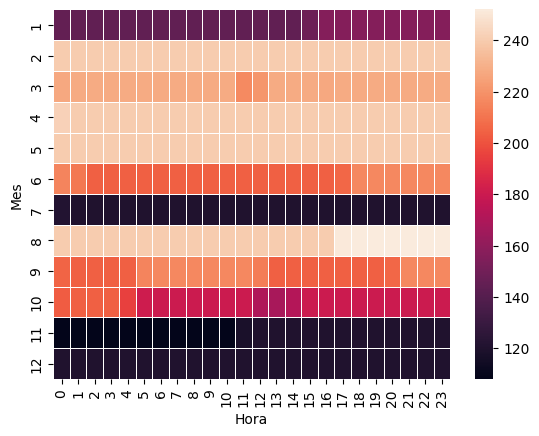

In [ ]:
import seaborn as sns
sns.heatmap(data=df_resume, linewidth=.5)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df2= df.loc[(df['Mes'] == 2)]
X=df2[['Temperatura','Hora']]
y=df2['Radiacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_regressor = SVR(kernel='linear')

svm_regressor.fit(X_train_scaled, y_train)
y_pred = svm_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)





Error cuadrático medio (MSE): 28724.42
Coeficiente de determinación (R2): 0.59


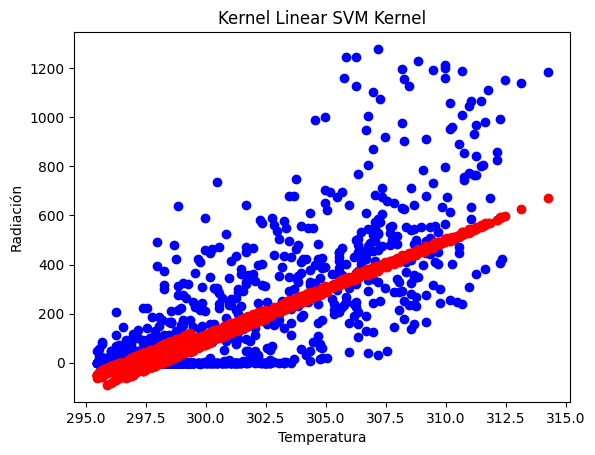

In [ ]:
print("Error cuadrático medio (MSE): {:.2f}".format(mse))
print("Coeficiente de determinación (R2): {:.2f}".format(r2))
plt.scatter(X_test['Temperatura'], y_test, color='blue')
plt.scatter(X_test['Temperatura'], y_pred, color='red')
plt.xlabel('Temperatura')
plt.ylabel('Radiación')
plt.title('Kernel Linear SVM Kernel')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Temperatura', 'Hora']]
y = df['Radiacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Error cuadrático medio (MSE): 13859.89
Coeficiente de determinación (R2): 0.74


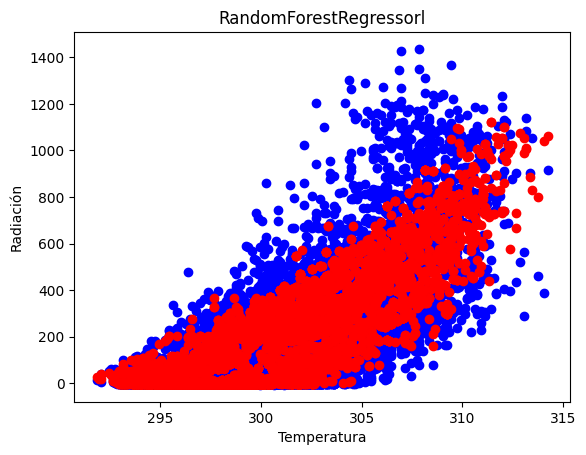

In [ ]:
print("Error cuadrático medio (MSE): {:.2f}".format(mse))
print("Coeficiente de determinación (R2): {:.2f}".format(r2))
plt.scatter(X_test['Temperatura'], y_test, color='blue')
plt.scatter(X_test['Temperatura'], y_pred, color='red')
plt.xlabel('Temperatura')
plt.ylabel('Radiación')
plt.title('RandomForestRegressorl')
plt.show()

Error cuadrático medio (MSE): 12994.55
Coeficiente de determinación (R2): 0.76


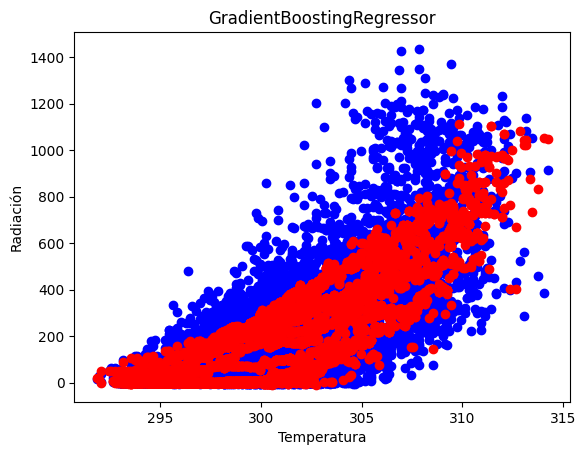

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Temperatura', 'Hora']]
y = df['Radiacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42, max_depth=5)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE): {:.2f}".format(mse))
print("Coeficiente de determinación (R2): {:.2f}".format(r2))
plt.scatter(X_test['Temperatura'], y_test, color='blue')
plt.scatter(X_test['Temperatura'], y_pred, color='red')
plt.xlabel('Temperatura')
plt.ylabel('Radiación')
plt.title('GradientBoostingRegressor')
plt.show()


Error cuadrático medio (MSE) del modelo conjunto: 13072.84
Coeficiente de determinación (R2) del modelo conjunto: 0.76


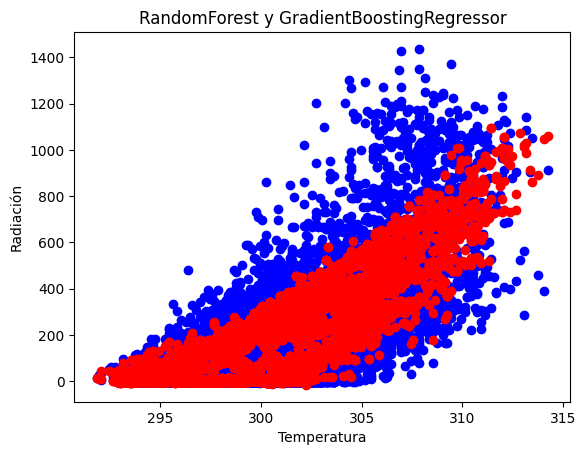

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)
y_pred_gb = gb_regressor.predict(X_test)

y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2

mse = mean_squared_error(y_test, y_pred_ensemble)
r2 = r2_score(y_test, y_pred_ensemble)

print("Error cuadrático medio (MSE) del modelo conjunto: {:.2f}".format(mse))
print("Coeficiente de determinación (R2) del modelo conjunto: {:.2f}".format(r2))



plt.scatter(X_test['Temperatura'], y_test, color='blue')
plt.scatter(X_test['Temperatura'], y_pred_ensemble, color='red')
plt.xlabel('Temperatura')
plt.ylabel('Radiación')
plt.title('RandomForest y GradientBoostingRegressor')
plt.show()



In [ ]:
y_test

array([201.,  -1.,  -1., ...,  -1., 984.,  -2.])